In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To display all the columns
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('train.csv') 
print(dataset.shape)

(1460, 81)


### Data Analysis

1. Missing Values
2. All numerical variables
3. Distribution of numerical values
4. Categorical variables
5. Cardinality of categorical variables
6. Outliers
7. Relationship between dependent and independent feature (Saleprice)

In [3]:
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum() > 1]

for feat in features_with_nan:
    print(feat, np.round(dataset[feat].isnull().mean(), 4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


##### We found the missing values now we have to decide whether we have to handle it for that specific column or not

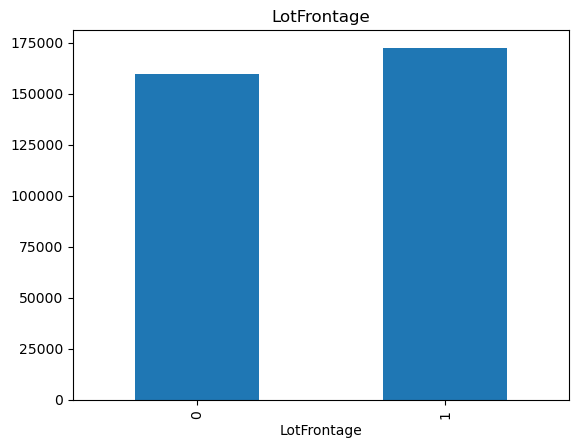

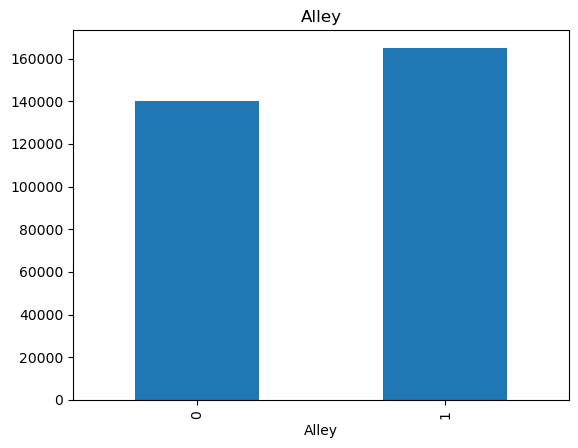

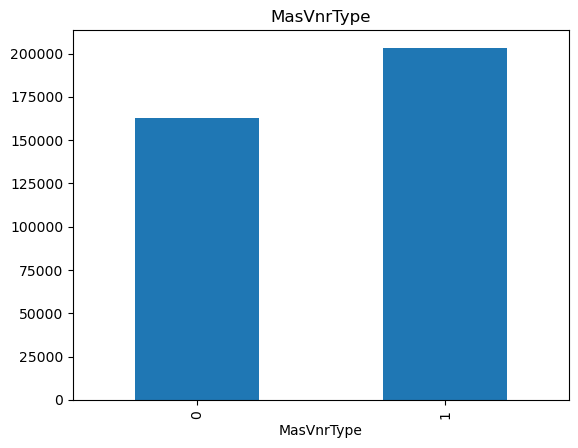

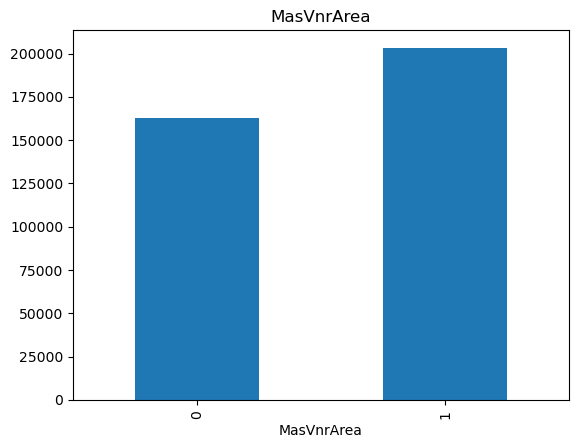

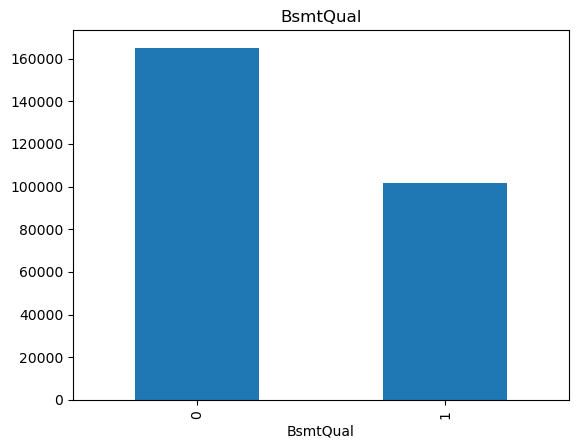

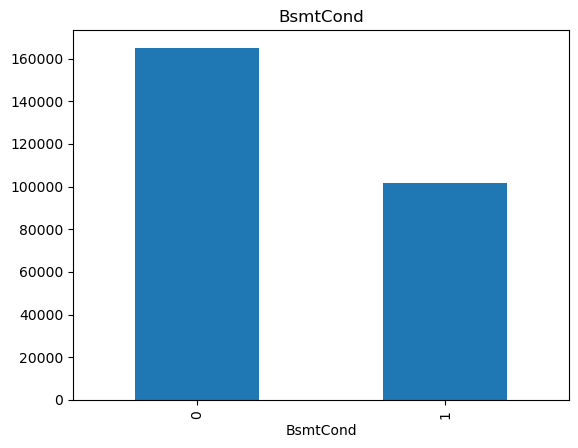

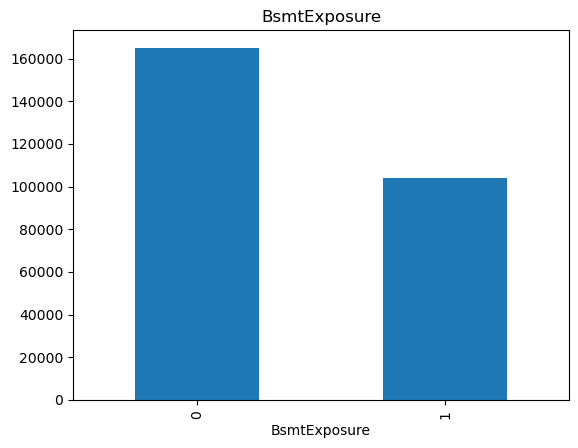

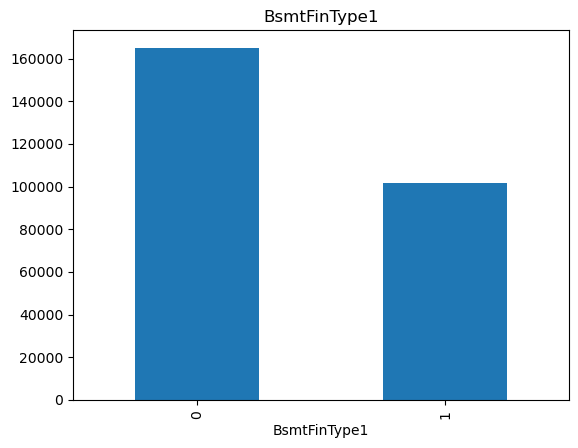

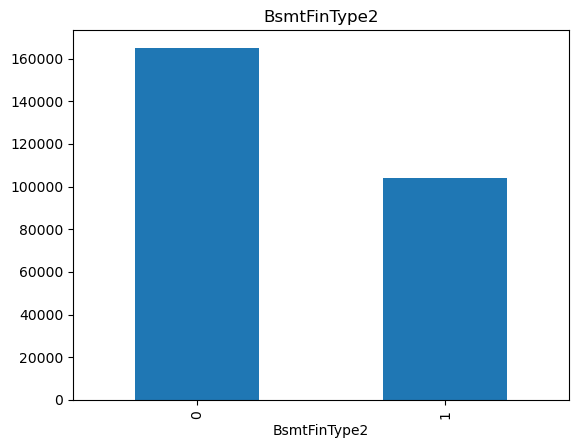

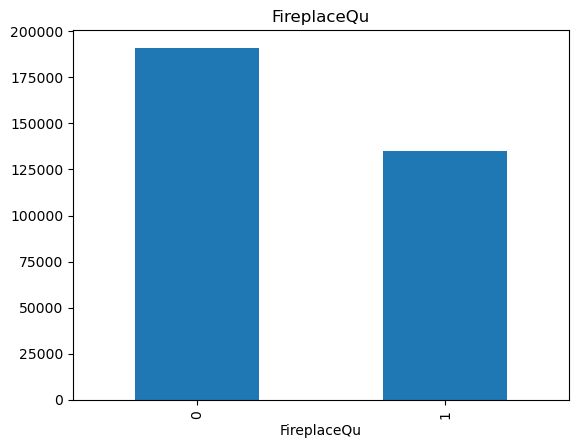

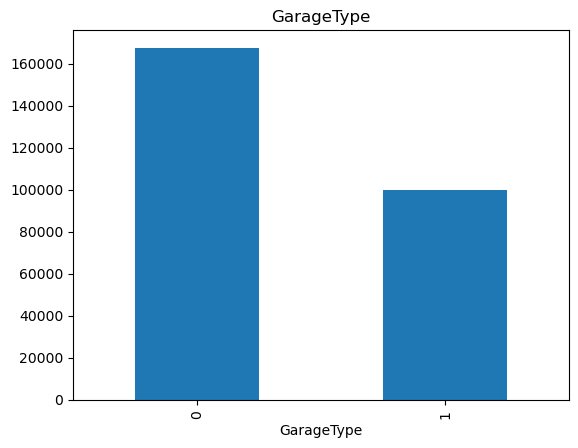

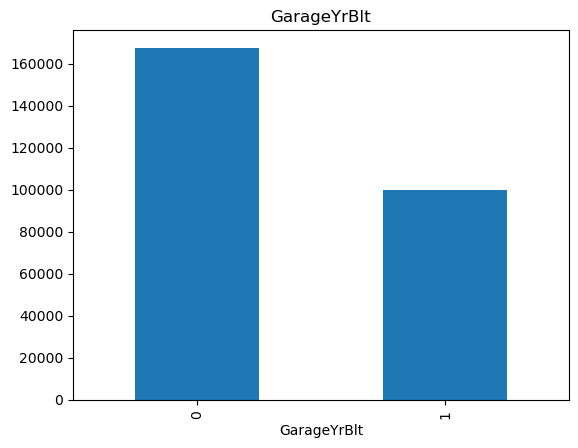

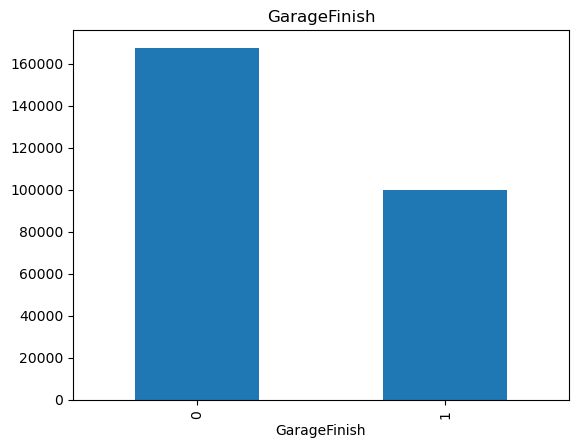

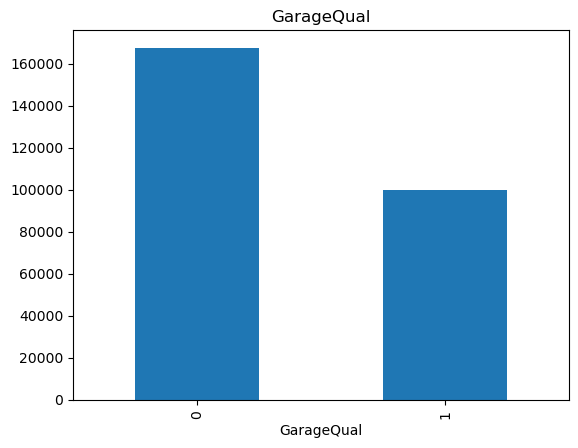

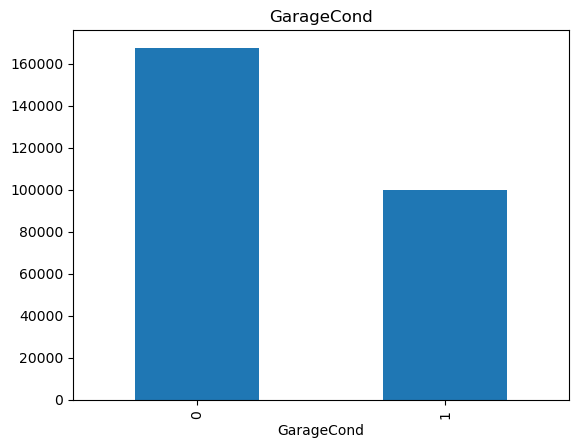

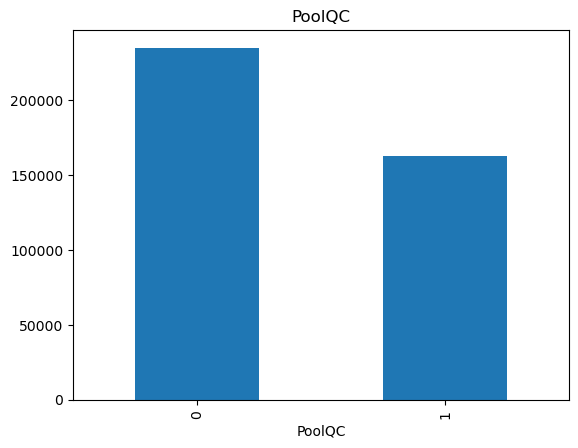

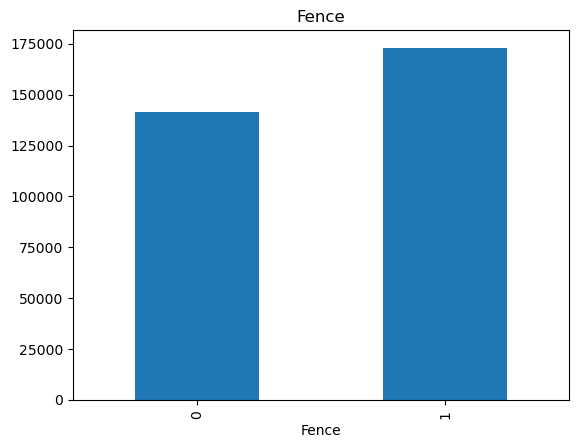

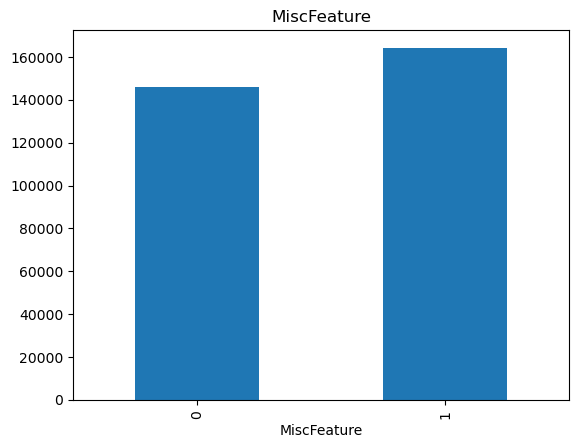

In [4]:
for feature in features_with_nan:
    data = dataset.copy()
    
    #Making 1 when the null else 0
    data[feature] = np.where(data[feature].isnull(),1,0)
    
    #grouping by feature and calculating the median of SalePrice for number of zero's and number of 1's
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

##### We are getting some relation with the nan value so we have to do something of nan value in feature engineering

## 2. Finding Numerical Values

In [5]:
#object is for char or string 
num_features = [feature for feature in dataset.columns if dataset[feature].dtypes != object]

print('Total Numerical Features : ',len(num_features))

Total Numerical Features :  38


In [6]:
dataset[num_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


### Temporal Variables : (e.g. datetime variables)

In [7]:
year_feat = [feature for feature in dataset.columns if 'Yr' in feature or 'Year' in feature]

year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

##### These values will change according time, so we will analyse the dependence of it

In [8]:
for feature in year_feat:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'Sale Price vs Year Sold')

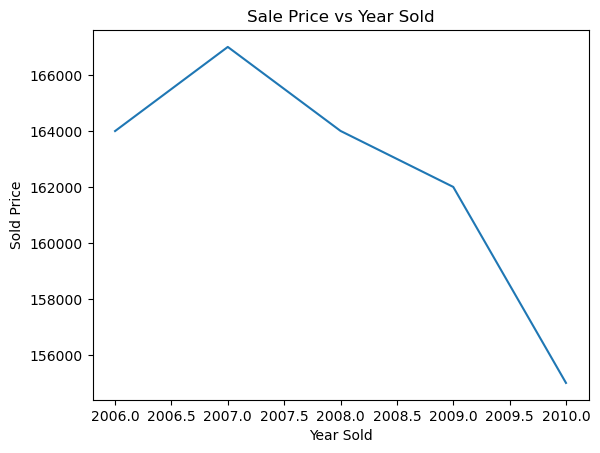

In [9]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Sold Price')
plt.title('Sale Price vs Year Sold')

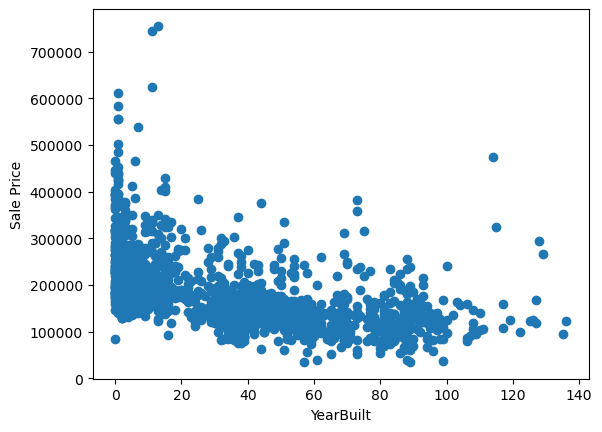

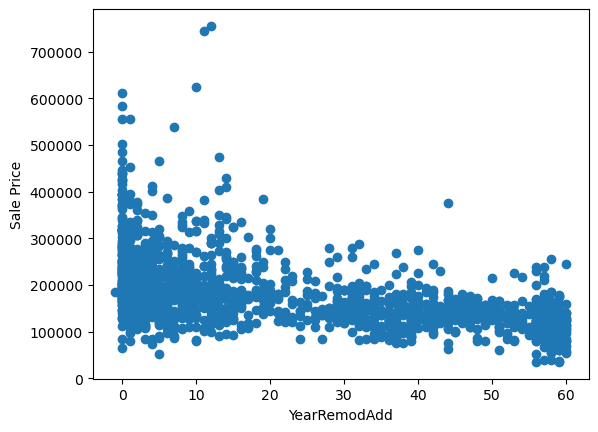

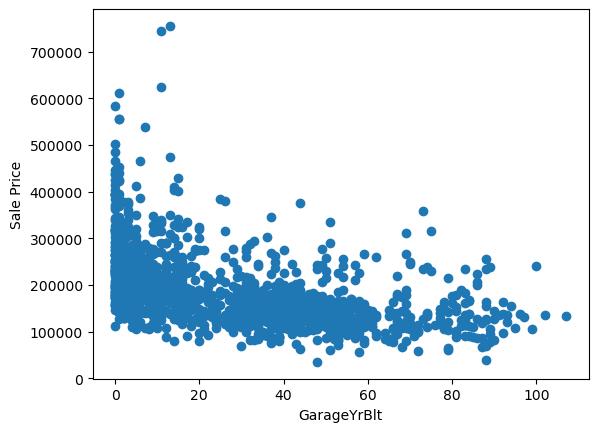

In [10]:
for feat in year_feat:
    if feat != 'YrSold' :
        data = dataset.copy()
        data[feat] = data['YrSold'] - data[feat]
        plt.scatter(data[feat],data['SalePrice'])
        plt.ylabel('Sale Price')
        plt.xlabel(feat)
        plt.show()

### Types of numerical Variables : 
1. Continuous Variables : Counts of individual items or values e.g. number of students
2. Discrete Variables : some fixed set or range of values e.g. distance, age

In [11]:
#Discrete Variables
discrete_feat = [feat for feat in num_features if len(dataset[feat].unique()) < 25 and feat not in year_feat+['Id']]

len(discrete_feat)

17

In [12]:
discrete_feat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [13]:
dataset[discrete_feat].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


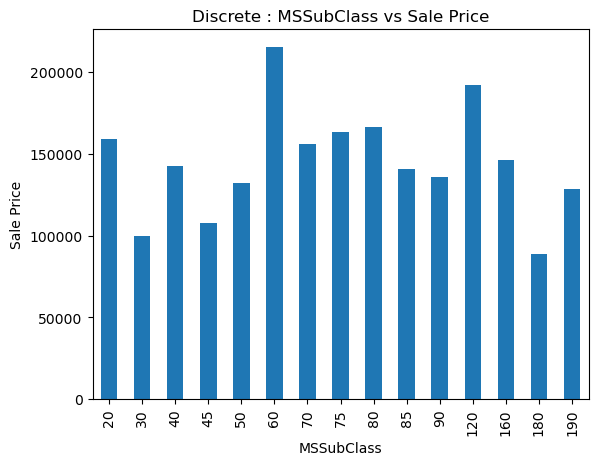

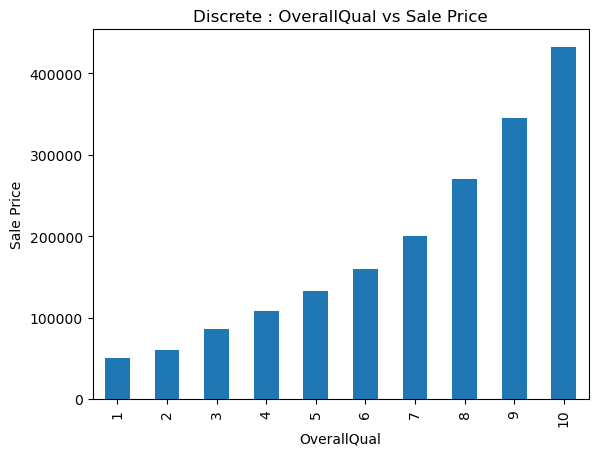

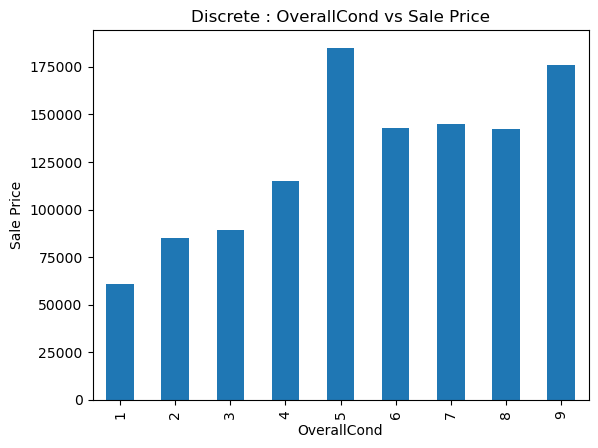

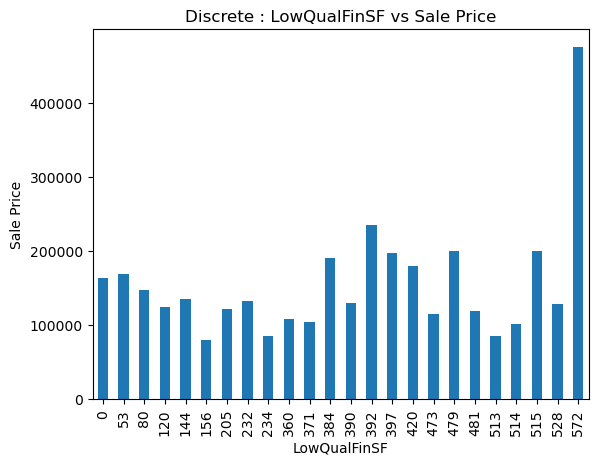

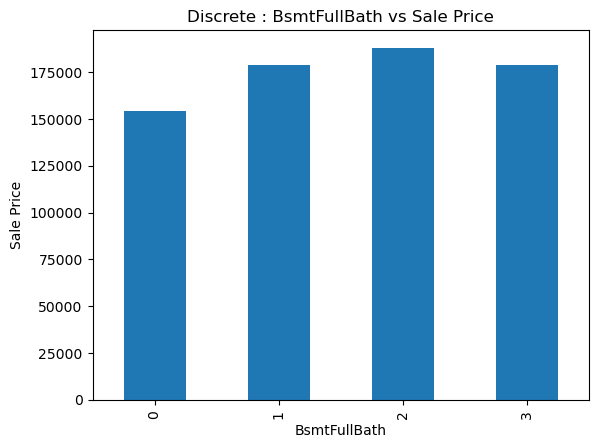

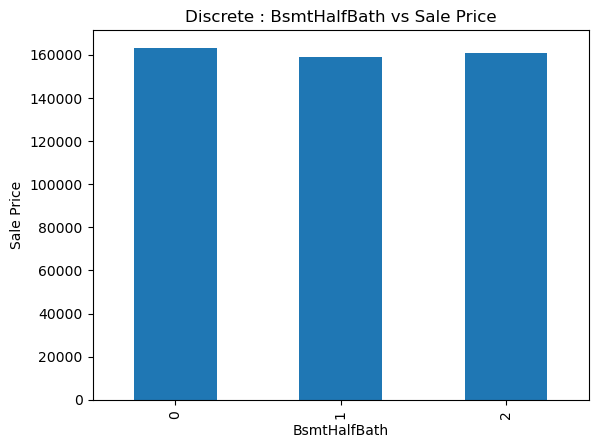

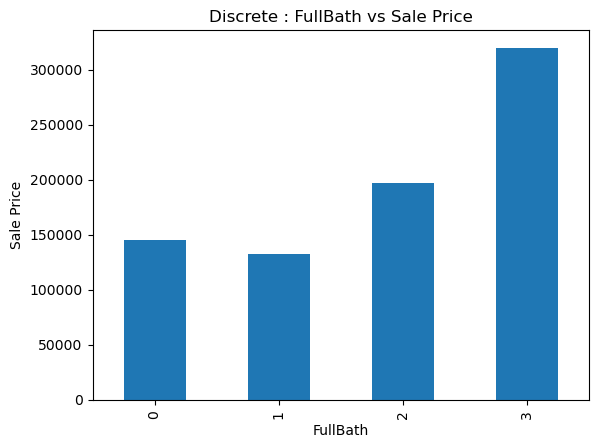

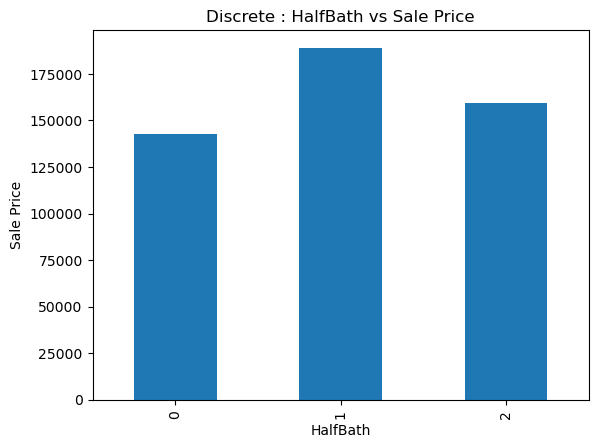

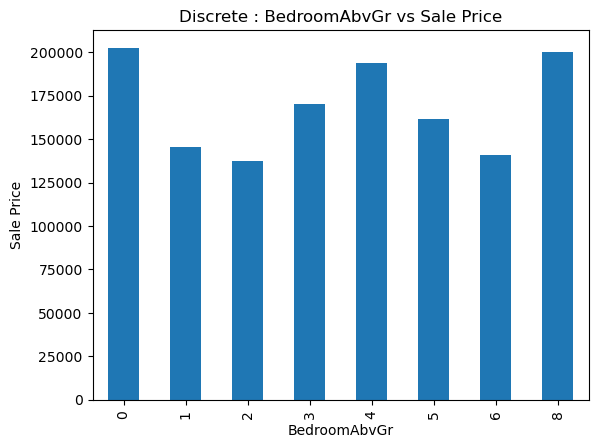

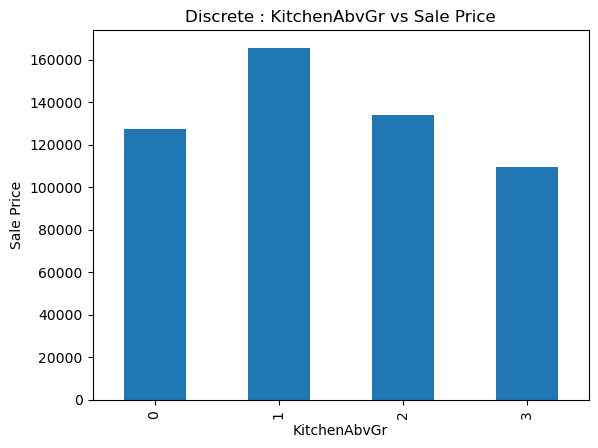

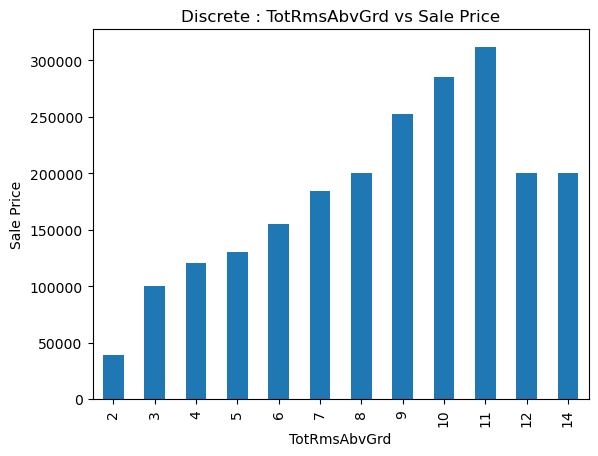

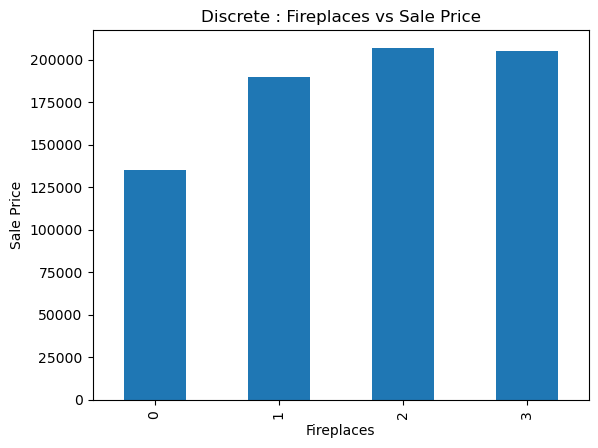

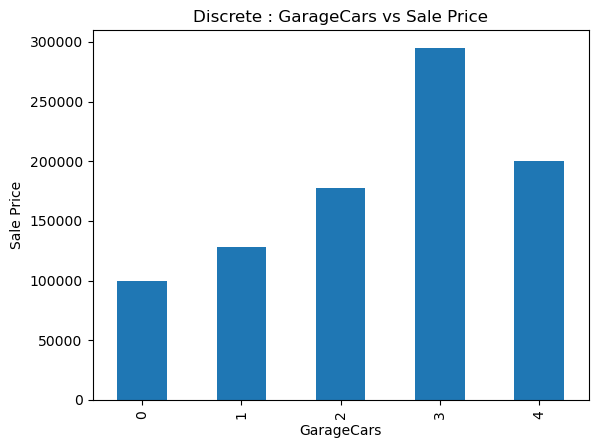

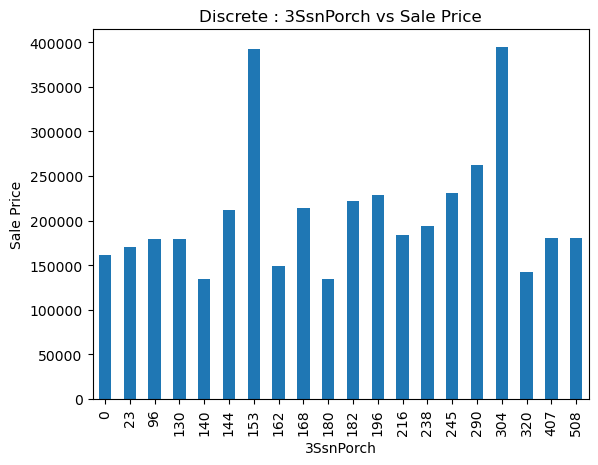

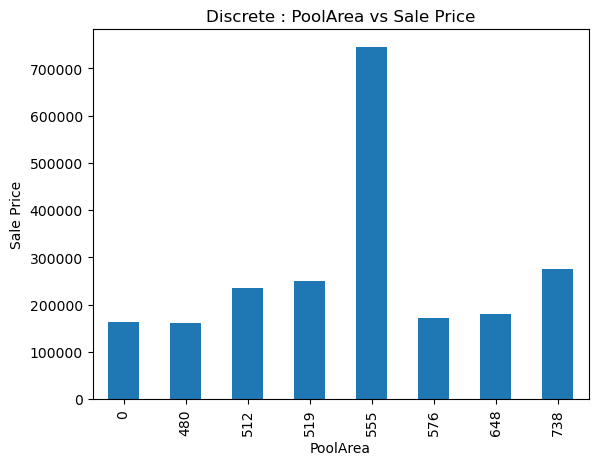

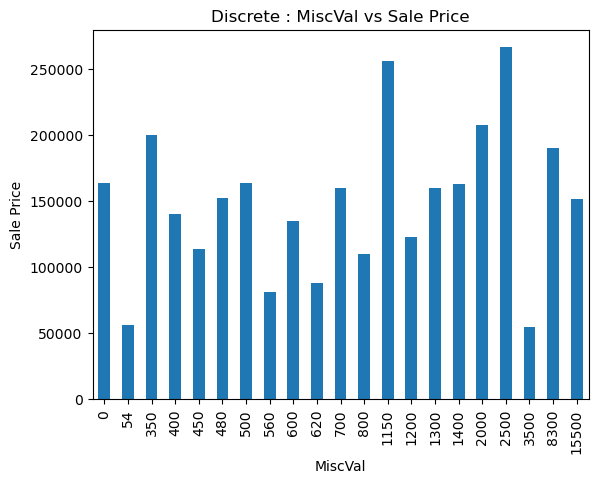

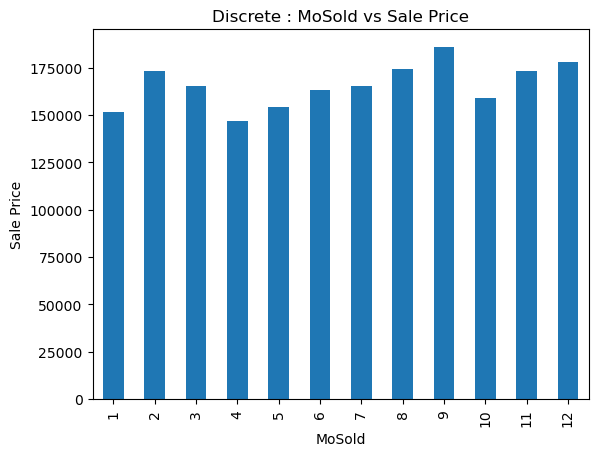

In [14]:
#Finding realtionship between discrete values and sale price

for feat in discrete_feat:
    data = dataset.copy()
    
    data.groupby(feat)['SalePrice'].median().plot.bar()
    
    plt.ylabel('Sale Price')
    plt.xlabel(feat)
    
    plt.title(('Discrete : {feature} vs Sale Price').format(feature = feat))
    plt.show()

In [19]:
# Continuous Variables
continous_feat = [feat for feat in num_features if feat not in discrete_feat+year_feat+['Id']]
len(continous_feat)

16

In [20]:
continous_feat

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

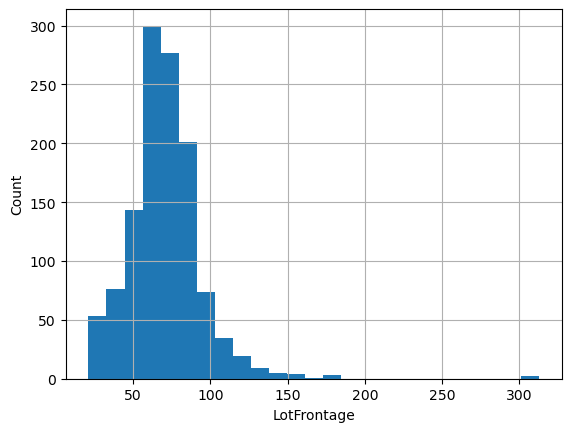

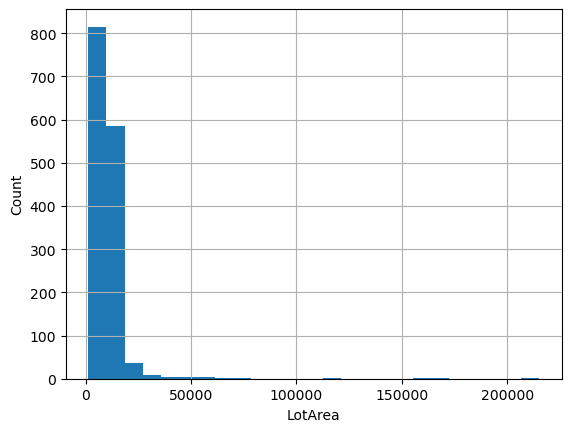

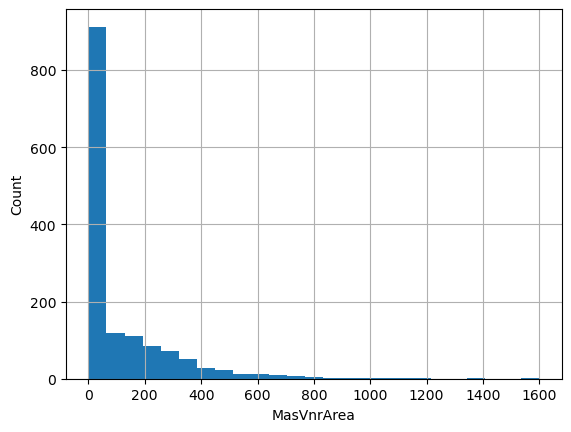

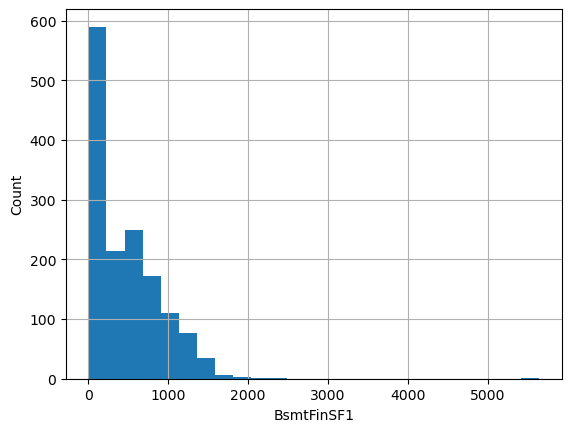

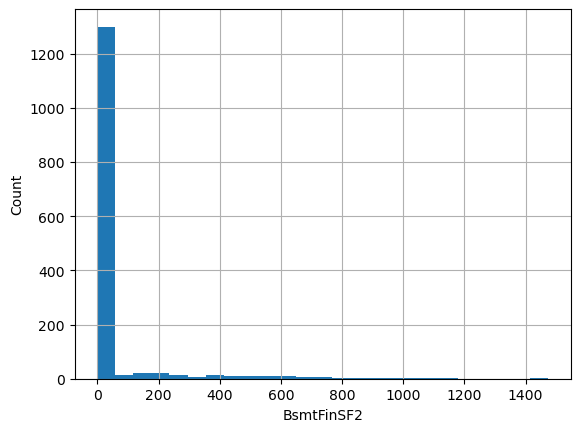

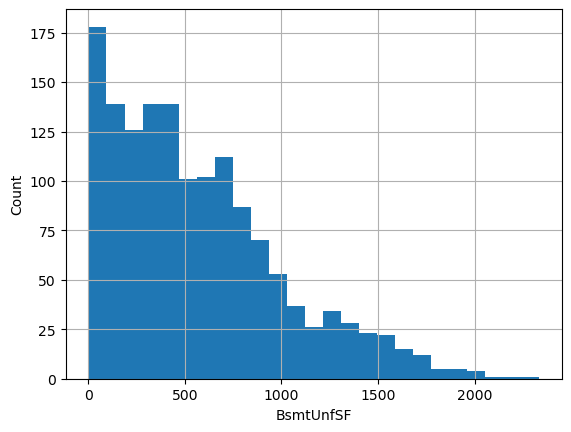

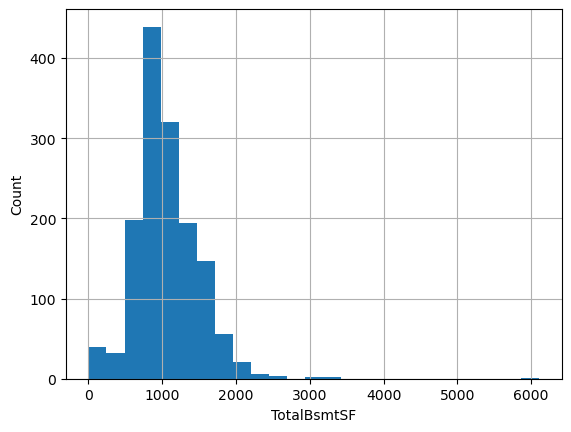

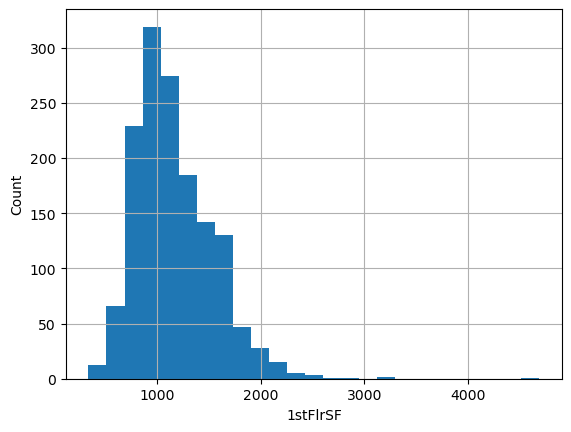

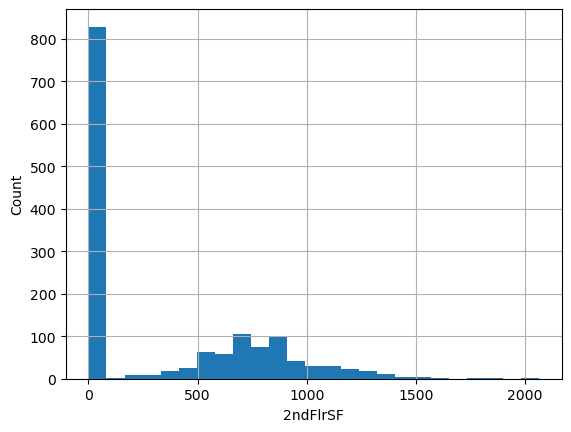

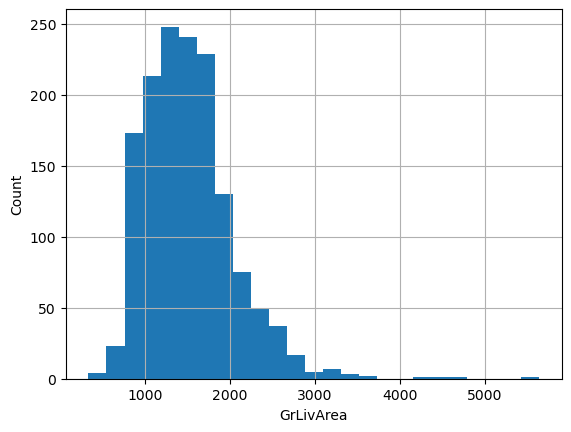

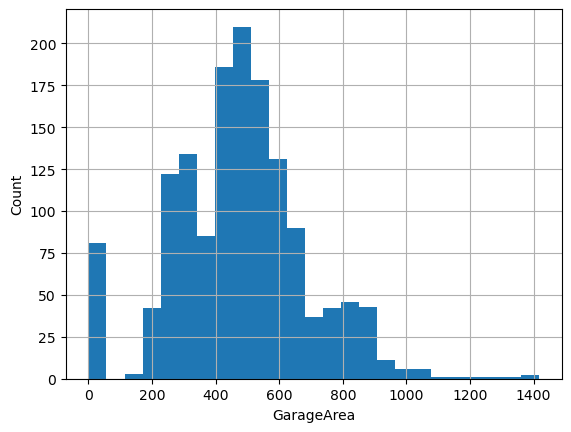

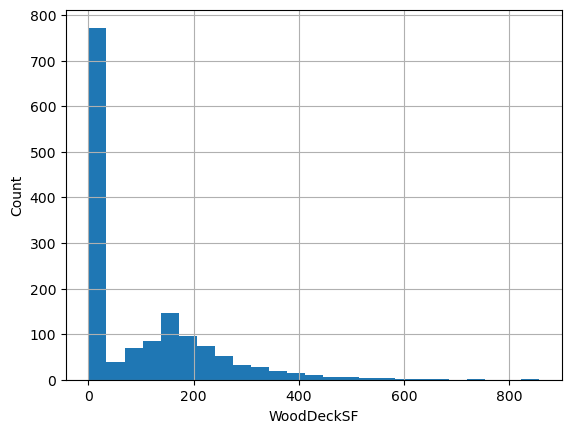

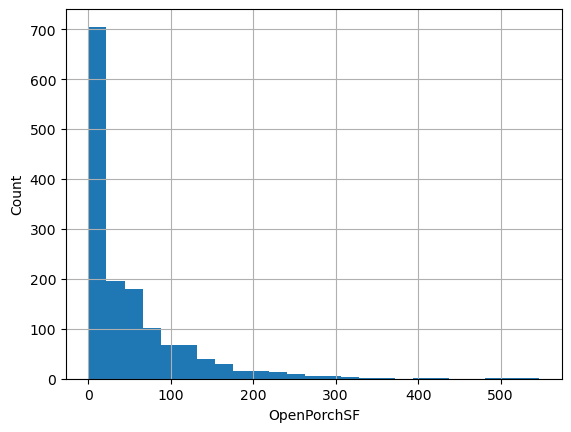

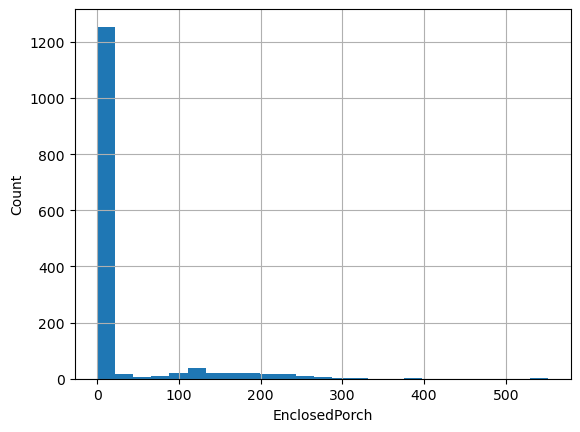

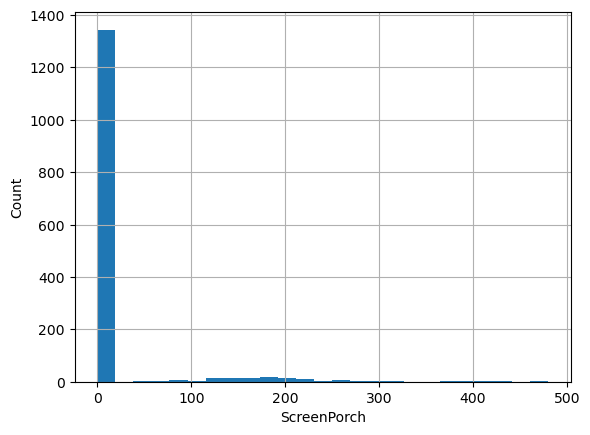

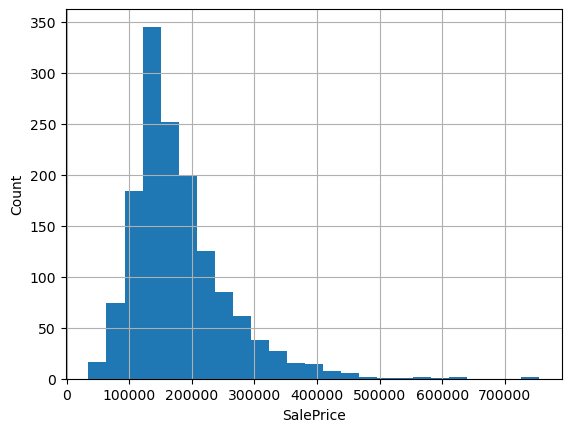

In [21]:
# Why Histograms ?
# Ans.
# Display the distribution of your continuous data.
# Reveal properties about your sample data in ways that summary statistics cannot.
# Help in displaying a large amount of data graphically, that is difficult to be put into tabular form.
# Make it easier to display data that are of various types and frequencies.
# Are useful for the visualization of the distribution of data.
# Help to find out the median, distribution, and variations in data.
# Show how often each different value in a set of data occurs.
# Are the most commonly used graph to show frequency distributions.

for feat in continous_feat:
    data = dataset.copy()
    data[feat].hist(bins=25)
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.show()
    
    

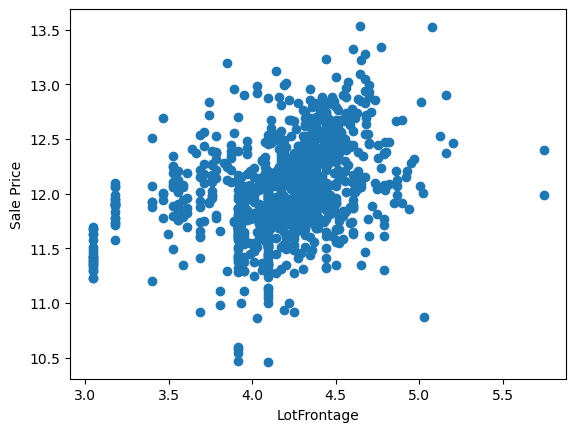

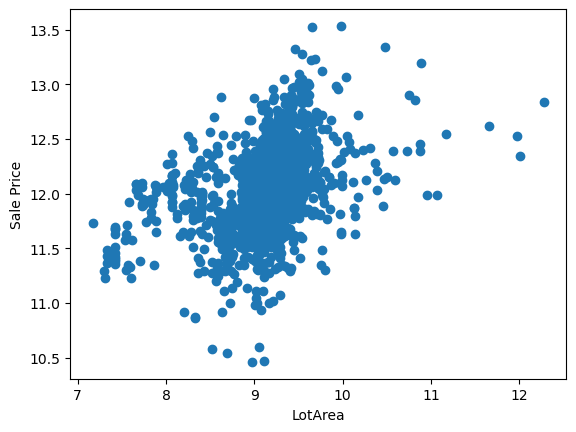

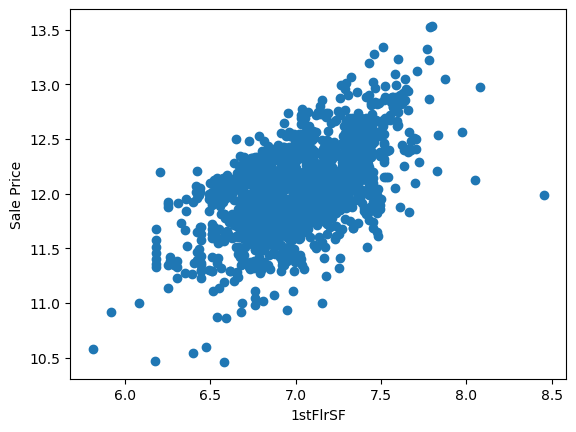

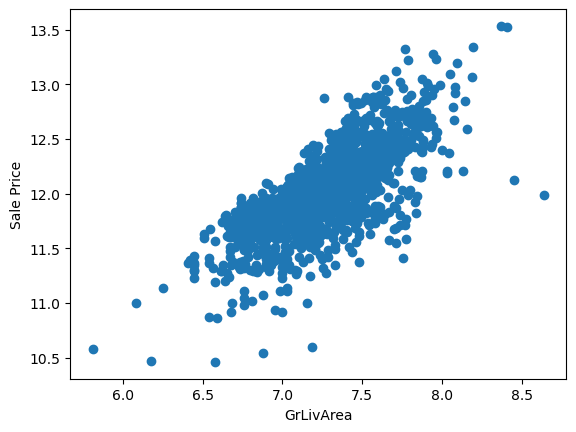

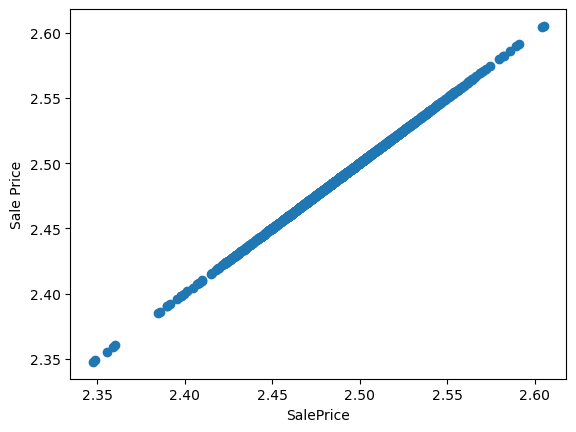

In [24]:
#Some of them shows gaussian distribution (Normalization) 
#so we can transformation technique to transform them into normalized form

#logarithmic transformation

for feat in continous_feat:
    data = dataset.copy()
#     log(0) = undefined
    if 0 in data[feat].unique():
        pass
    else :
        data[feat] = np.log(data[feat])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feat],data['SalePrice'])
        plt.xlabel(feat)
        plt.ylabel('Sale Price')
        plt.show()

## Outliers

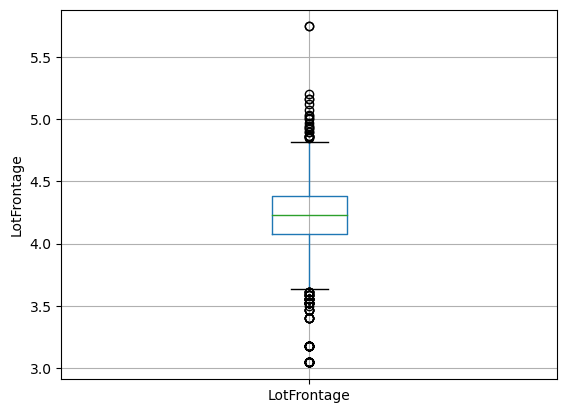

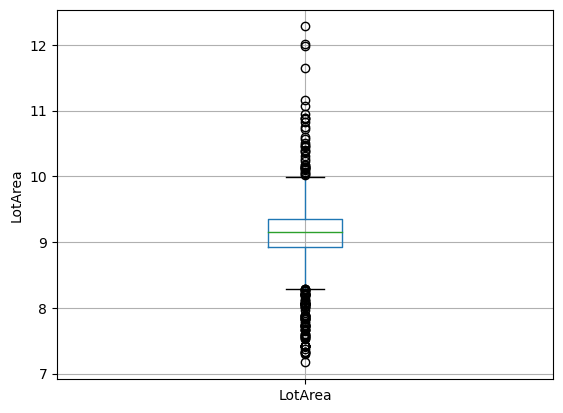

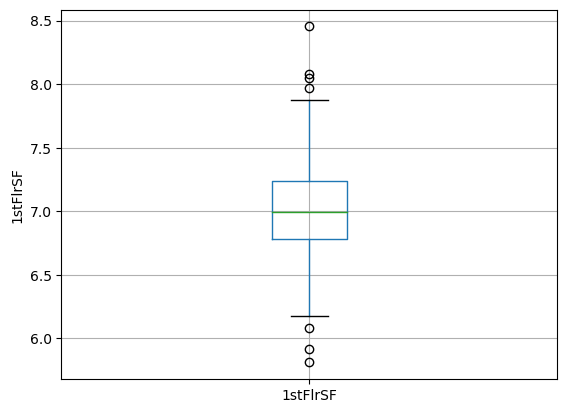

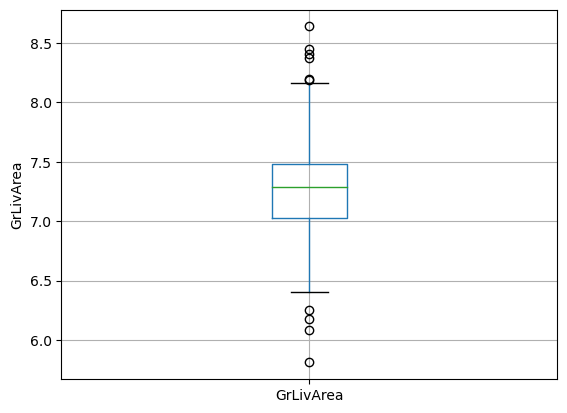

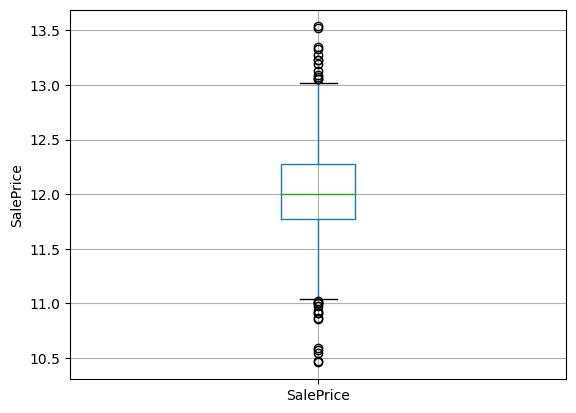

In [25]:

for feat in continous_feat:
    data = dataset.copy()
    if 0 in data[feat].unique():
        pass
    else:
        data[feat] = np.log(data[feat])
        data.boxplot(column = feat)
        plt.ylabel(feat);
        plt.show()

## Categorical Variables : 

In [27]:
categorical_feat = [feat for feat in dataset.columns if data[feat].dtypes == 'O']
categorical_feat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
dataset[categorical_feat]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [34]:
for feat in categorical_feat:
    print('The {} has {} number of categories'.format(feat,len(dataset[feat].unique())))

The MSZoning has 5 number of categories
The Street has 2 number of categories
The Alley has 3 number of categories
The LotShape has 4 number of categories
The LandContour has 4 number of categories
The Utilities has 2 number of categories
The LotConfig has 5 number of categories
The LandSlope has 3 number of categories
The Neighborhood has 25 number of categories
The Condition1 has 9 number of categories
The Condition2 has 8 number of categories
The BldgType has 5 number of categories
The HouseStyle has 8 number of categories
The RoofStyle has 6 number of categories
The RoofMatl has 8 number of categories
The Exterior1st has 15 number of categories
The Exterior2nd has 16 number of categories
The MasVnrType has 5 number of categories
The ExterQual has 4 number of categories
The ExterCond has 5 number of categories
The Foundation has 6 number of categories
The BsmtQual has 5 number of categories
The BsmtCond has 5 number of categories
The BsmtExposure has 5 number of categories
The BsmtF

### Lets find the relationship between dependent feature variable and categorial features

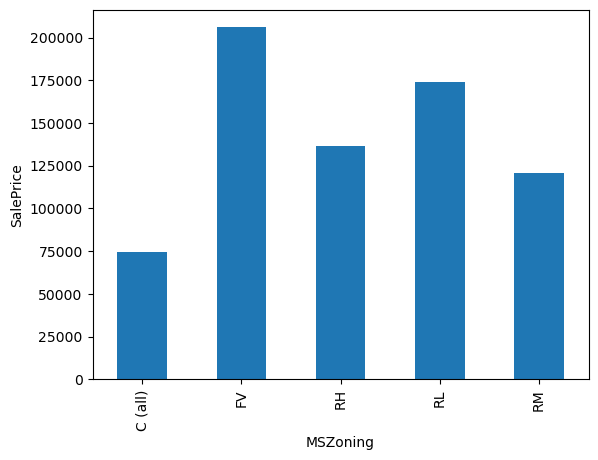

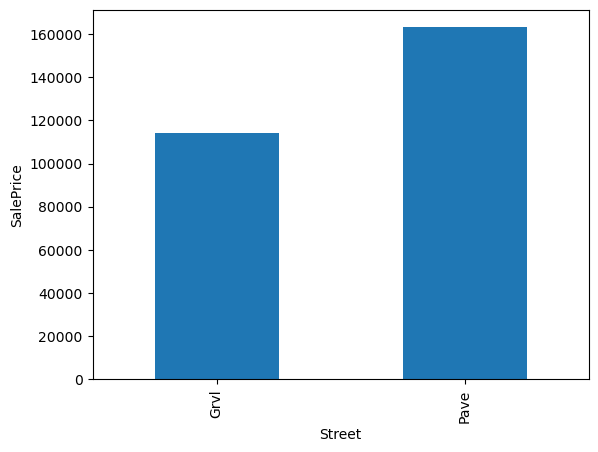

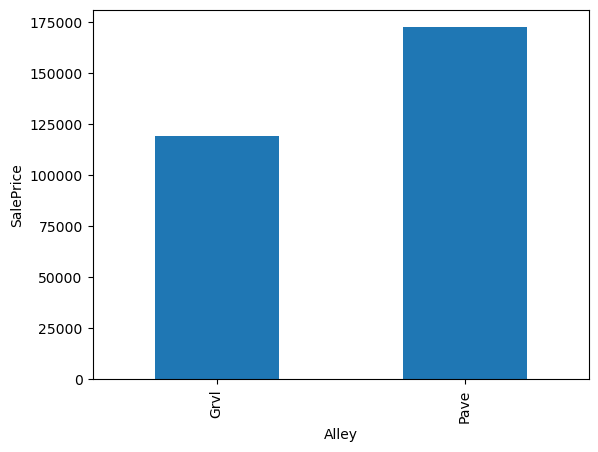

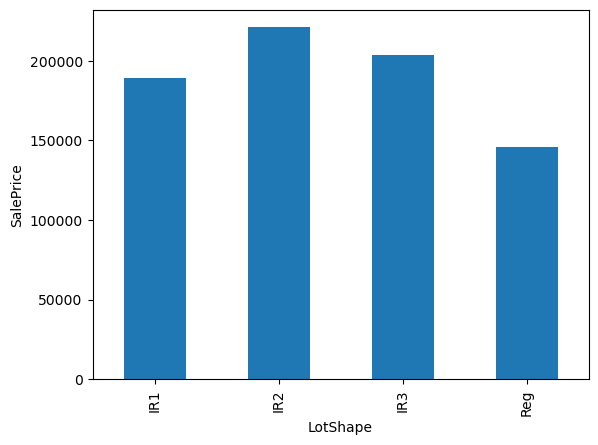

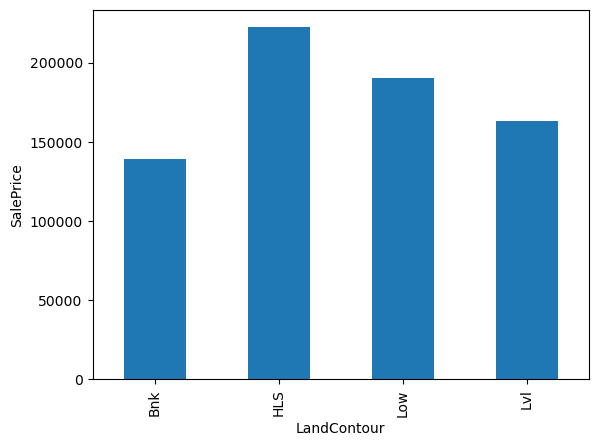

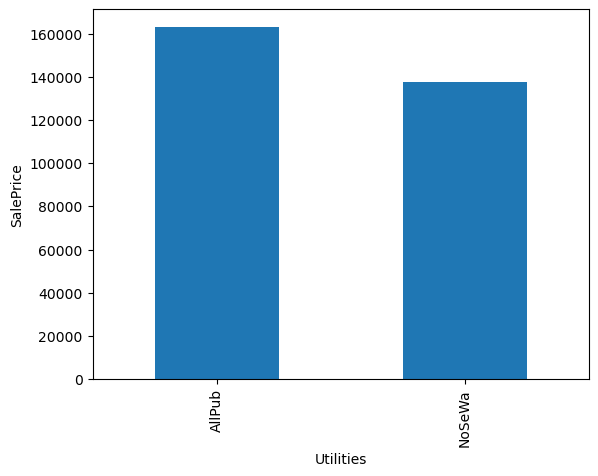

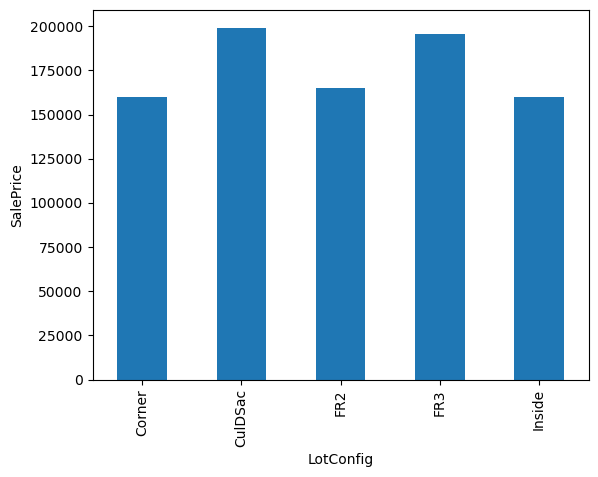

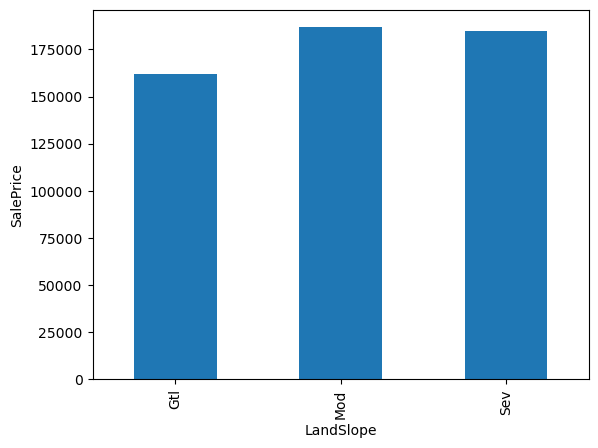

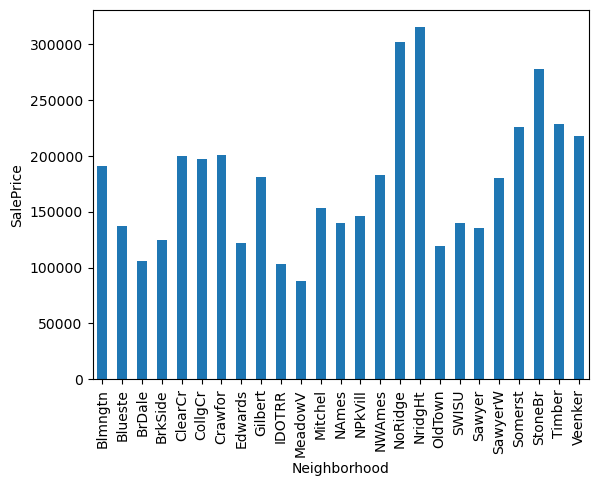

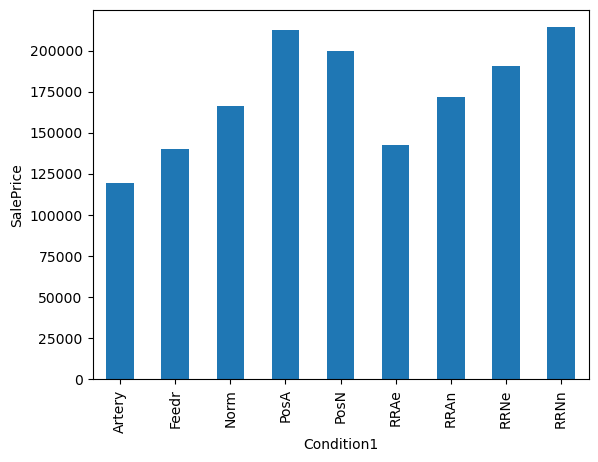

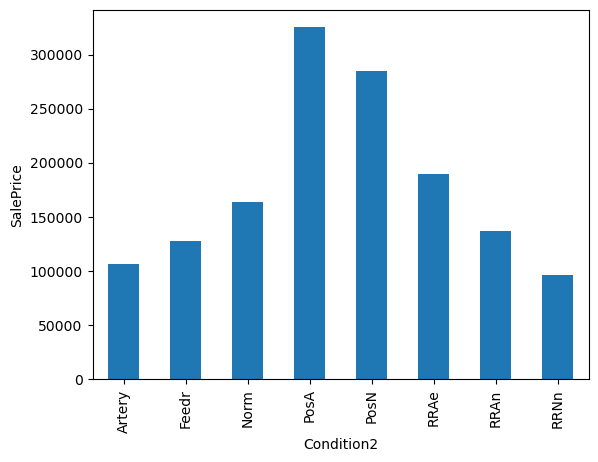

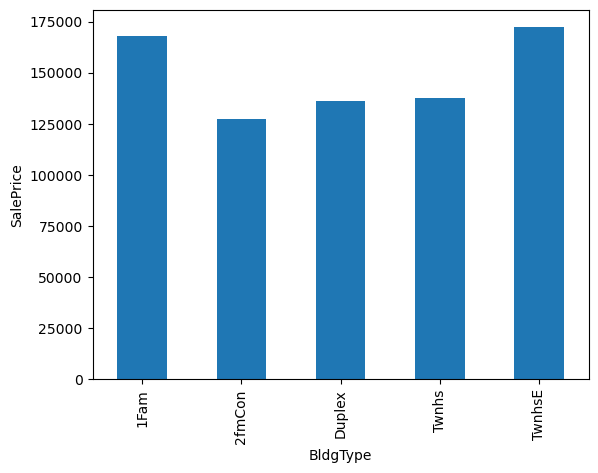

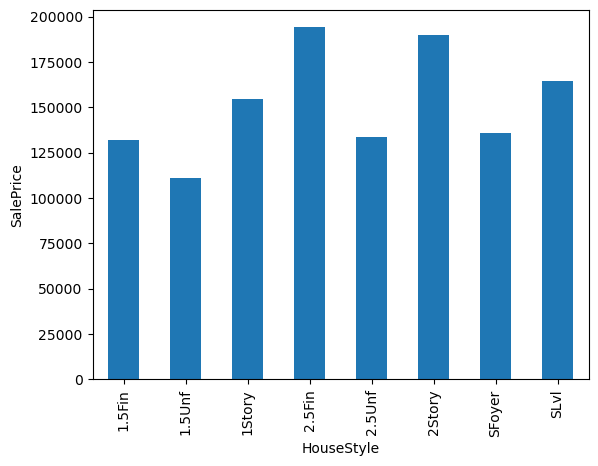

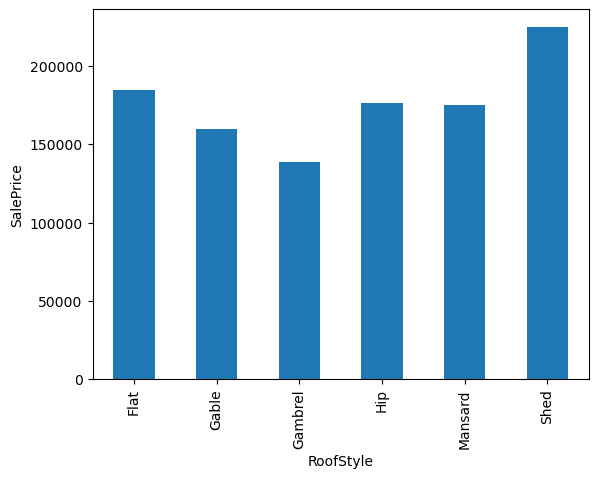

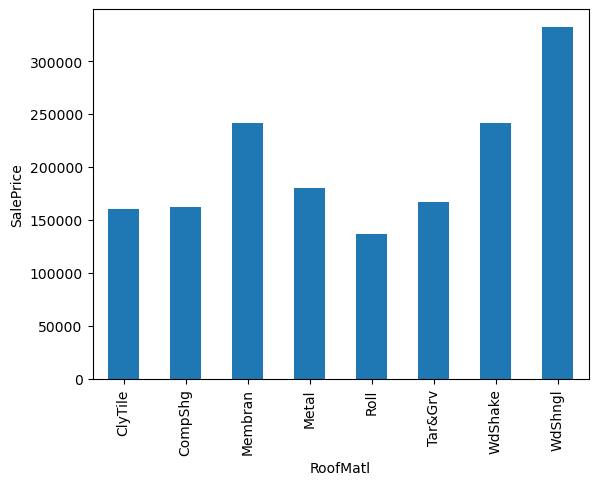

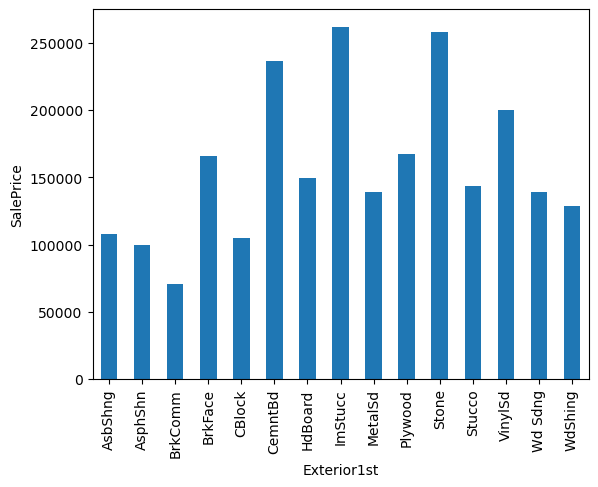

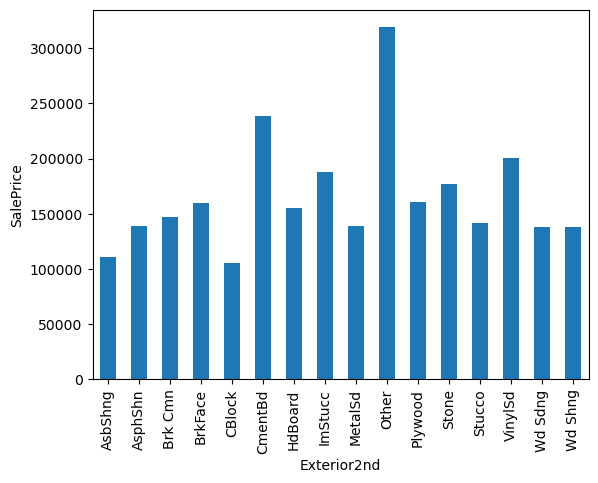

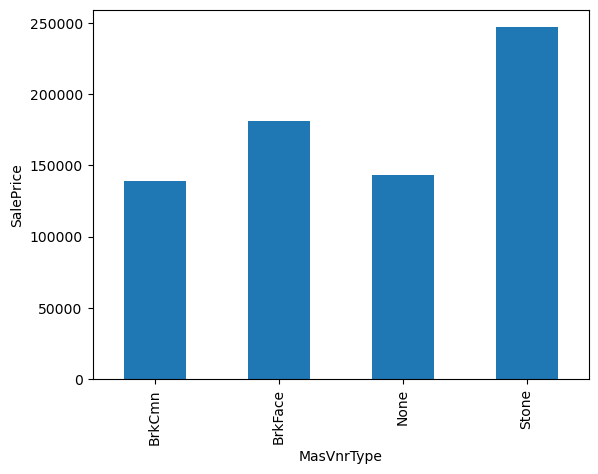

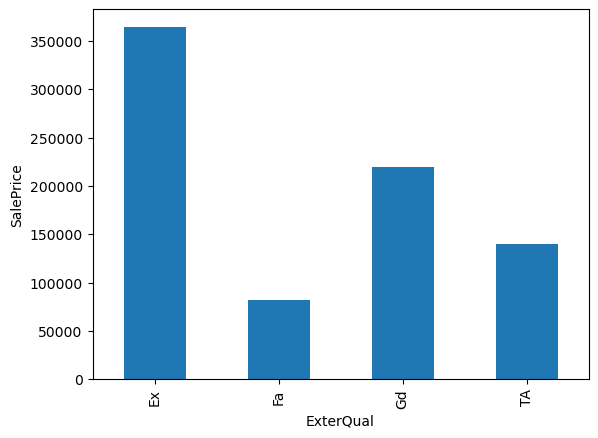

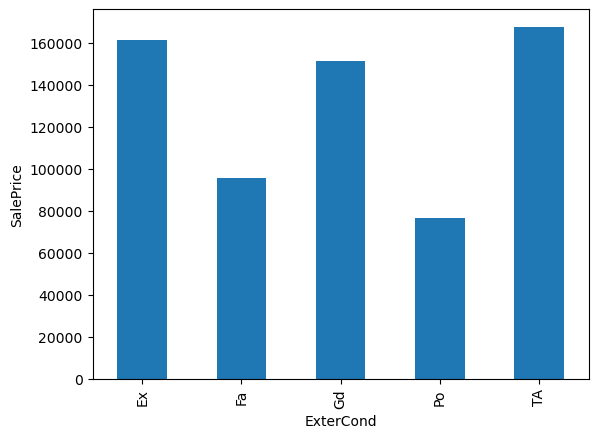

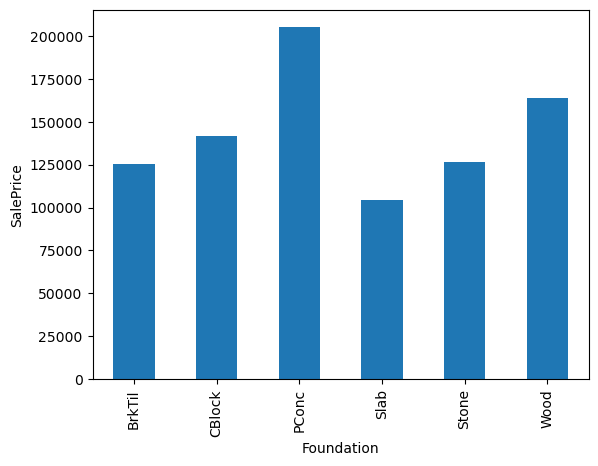

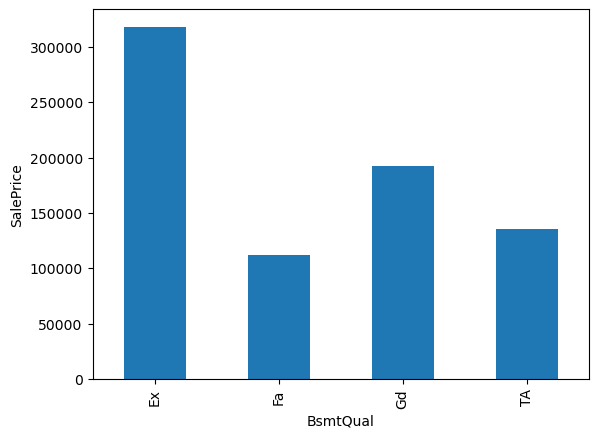

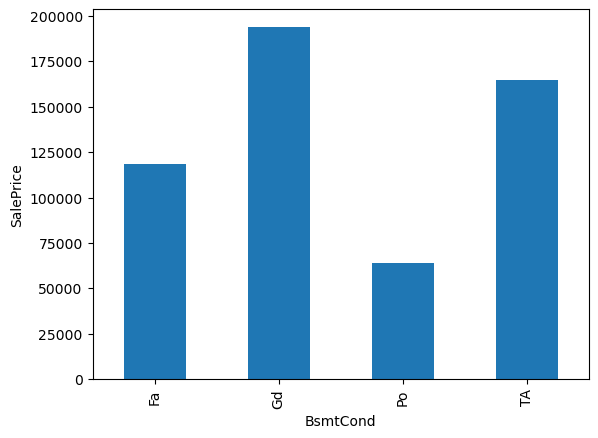

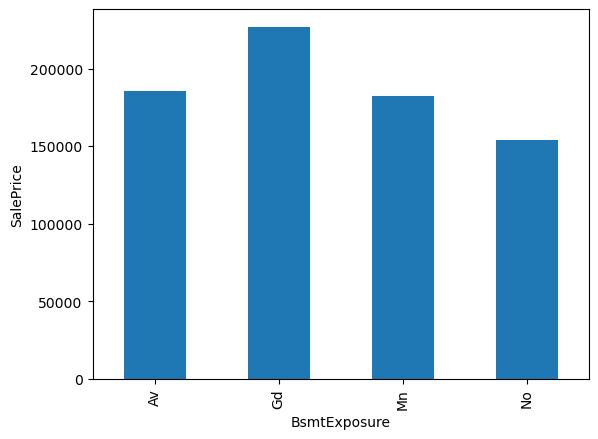

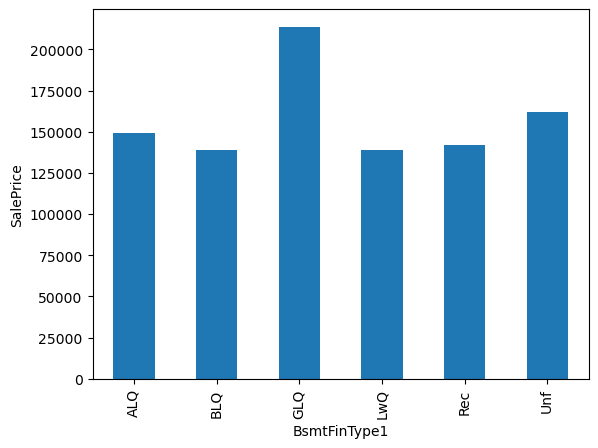

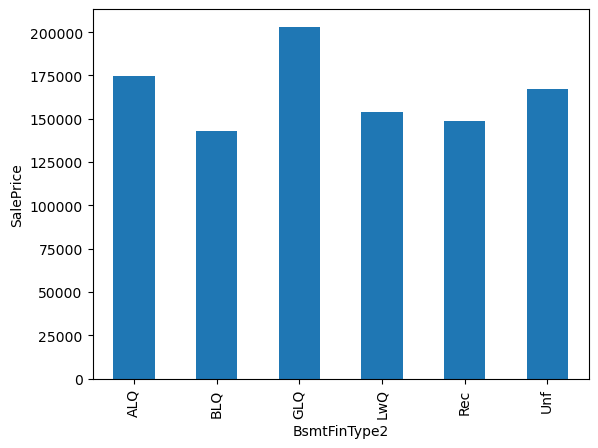

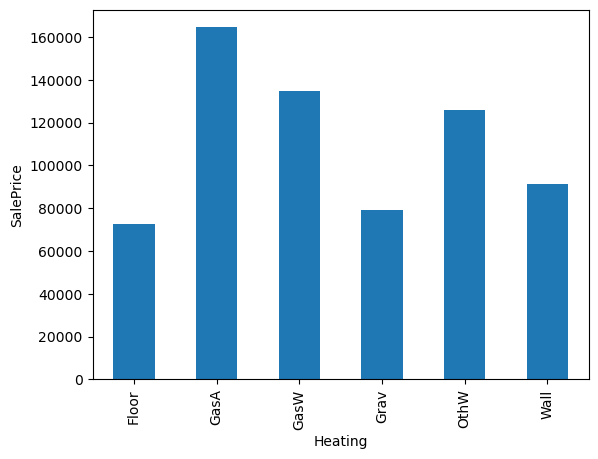

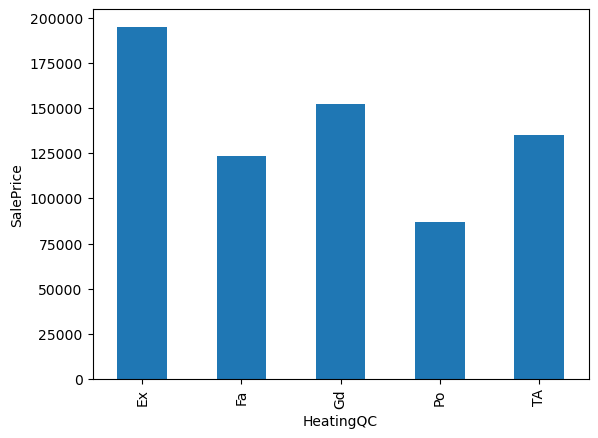

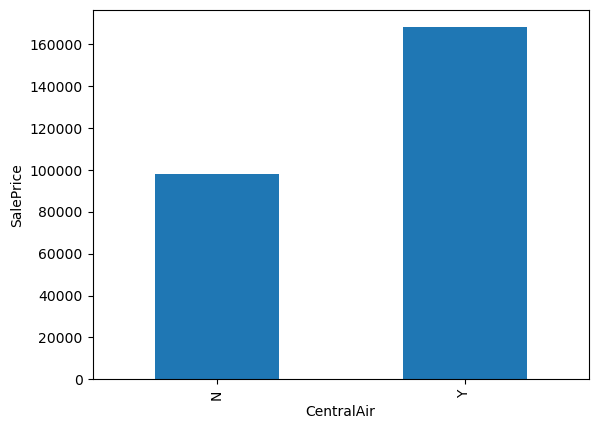

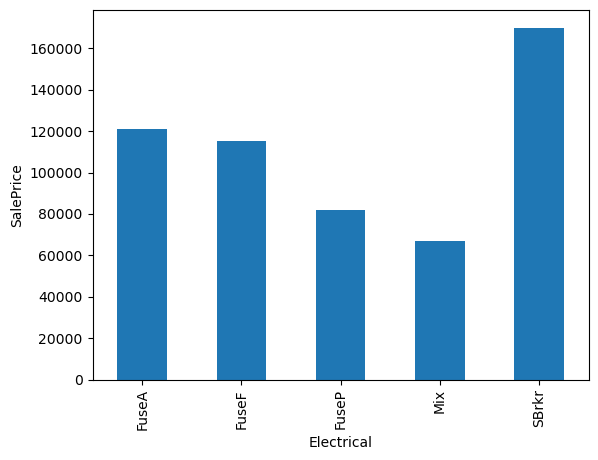

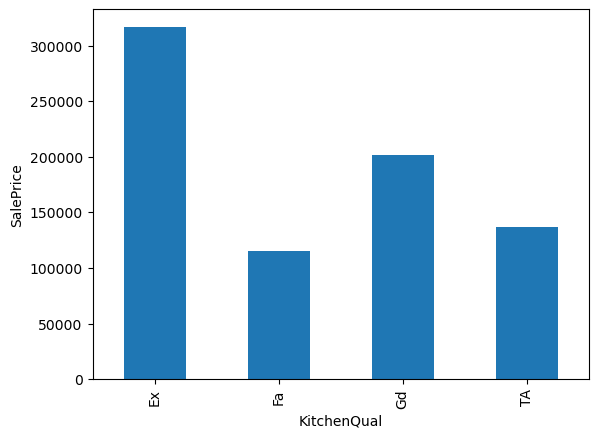

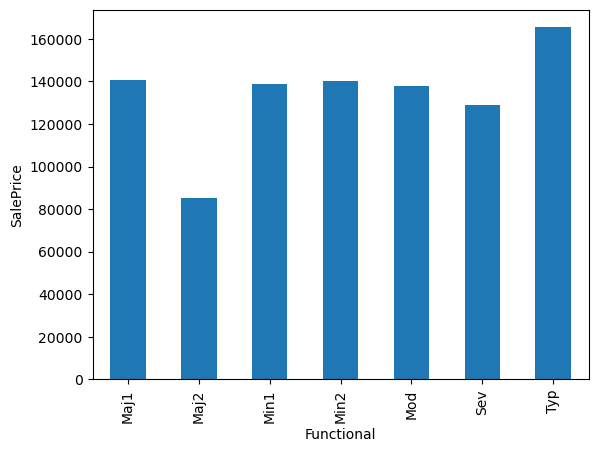

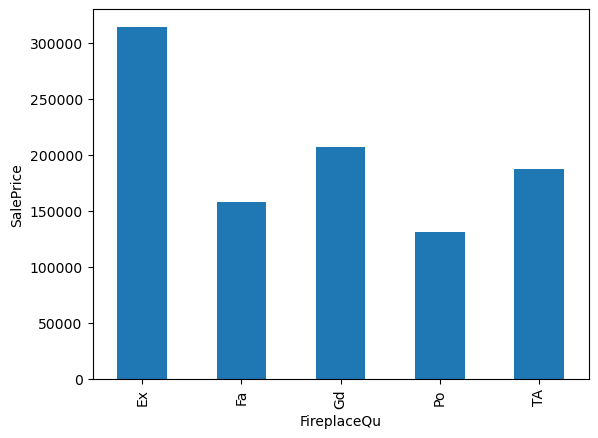

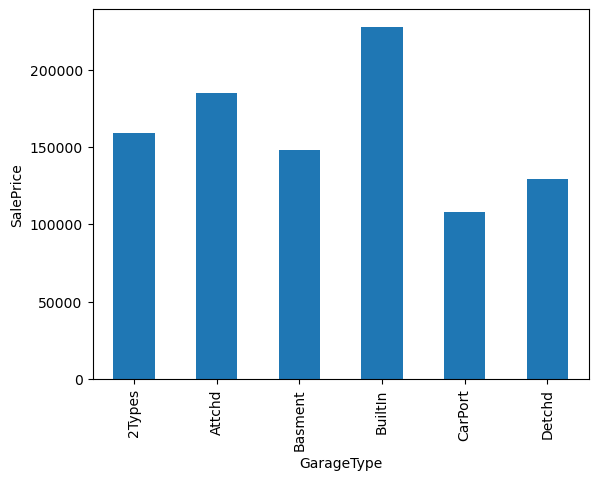

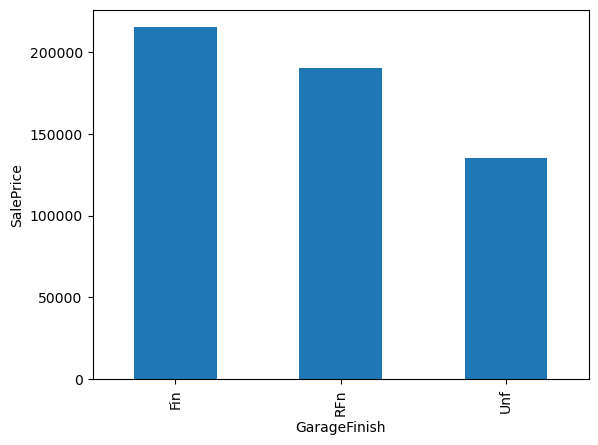

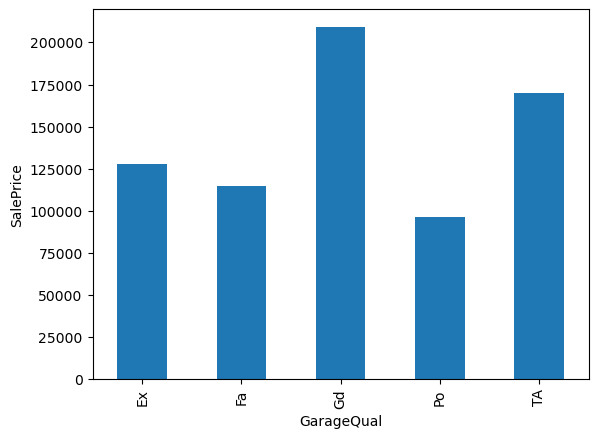

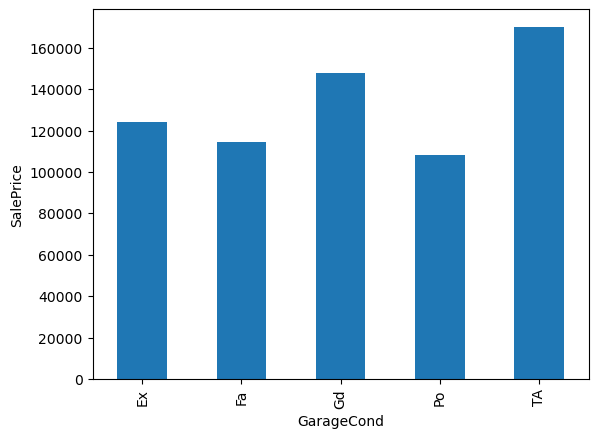

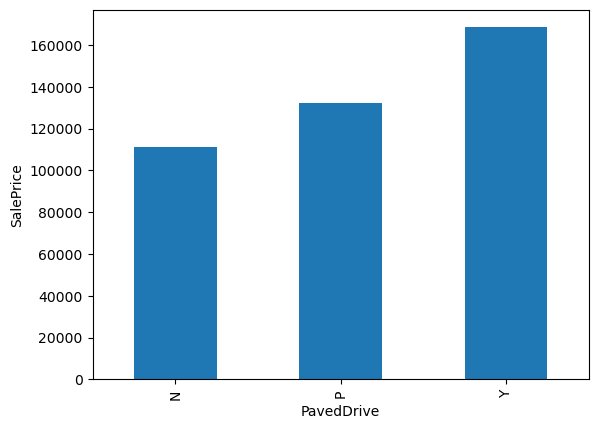

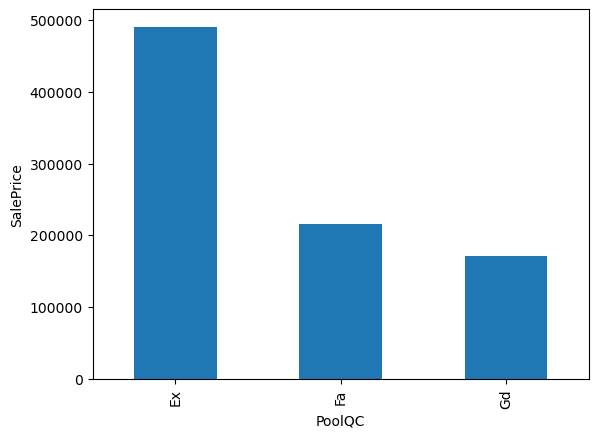

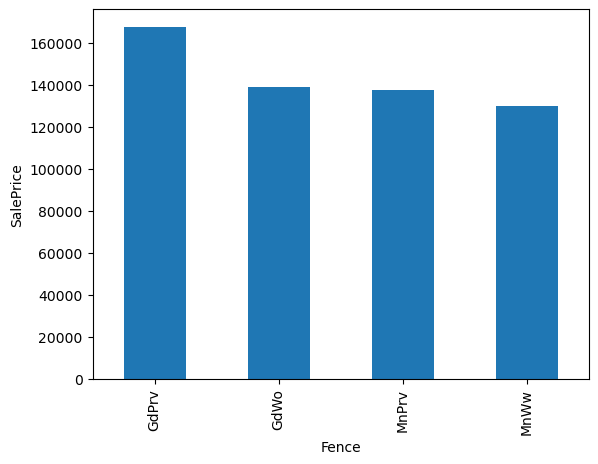

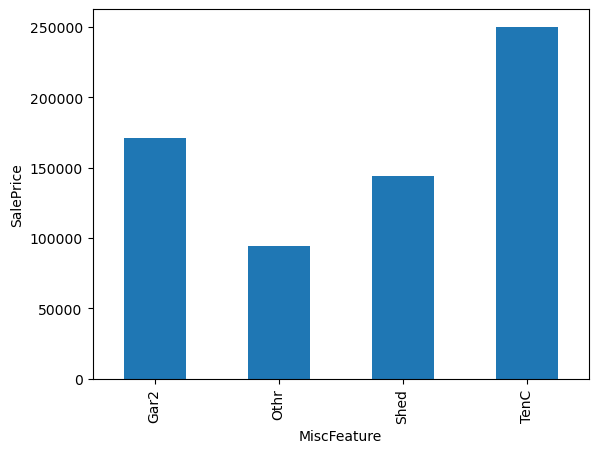

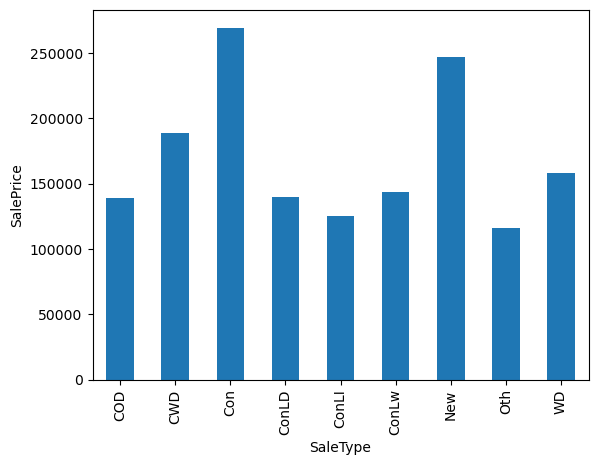

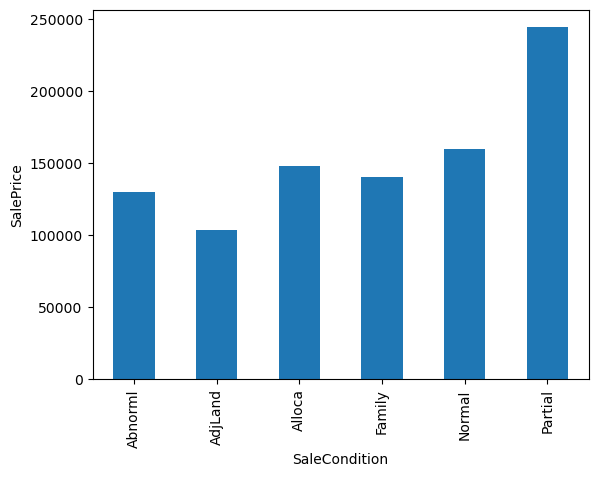

In [35]:
for feat in categorical_feat:
    data = dataset.copy()
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat);
    plt.ylabel('SalePrice')
    plt.show()